In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [68]:
C = 299792458.
fre24 = 2.437e9
fre5G = 5.150e9
initialrx = -96
initialtx = 16.0206

In [75]:
def calculate(frequence,distance):
    m_lamda = C/frequence
    numerator = m_lamda*m_lamda
    denominator = 16*np.pi*np.pi*distance*distance*1.0
    lossDb = -10*math.log(numerator/denominator)/math.log(10)
    return lossDb

In [104]:
def getloss(pt,frequence,distance):
    if(distance<=1):
        return pt-calculate(frequence,1);
    return pt-calculate(frequence,1)-10*3*math.log(distance)/math.log(10)

In [131]:
getloss(16,fre5G,10)

-60.6839278027072

In [106]:
x = np.linspace(0.1,1000,1000)

In [107]:
y = []
for item in x:
    y.append(getloss(16,fre5G,item))

In [108]:
y2 = []
for item in x:
    y2.append(getloss(16,fre,item))

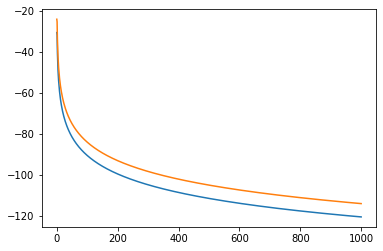

In [109]:

plt.plot(x,y)
plt.plot(x,y2)
plt.show()

In [125]:
def txForDist(tx,fr):
    if tx< -96:
        return 0
    directPathLoss = tx-calculate(fr,1)+96
    return 10**(directPathLoss/30)

In [137]:
txForDist(-30,fre5G)

4.4042206945013085

In [128]:
xd = np.linspace(16,-96,100)

In [129]:
yd24 = []
yd5 = []
for i in xd:
    yd24.append(txForDist(i,fre24))
    yd5.append(txForDist(i,fre5G))

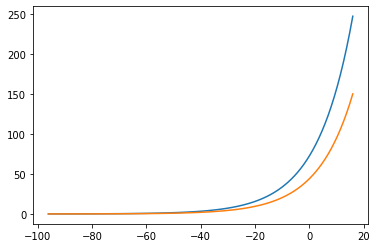

In [130]:

plt.plot(xd,yd24)
plt.plot(xd,yd5)
plt.show()